## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

**For this project, will discover the results of an A/B test run by an e-commerce website. The goal is to use the datasets to help companies figure out whether they should use the new page or keep the old page, or extend the test time before makeing decision.**

**This project will includes three parts, Probability calculations, A/B Test running, and Regression analysis.**


A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
#import packages
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import dataframe
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]  

294478

**The dataset has 294478 rows**

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**The dataset has 290584 unique users**

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

**11.97% of users converted their landing page**

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#There are 2 different ways that new_page and treatment don't line up.
new_control=df.query('landing_page =="new_page" and group == "control"')['user_id'].nunique()
old_treatment=df.query('landing_page =="old_page" and group == "treatment"')['user_id'].nunique()
not_lineup=new_control+old_treatment
not_lineup

3893

**There are 3893 times of the new_page and treatment don't line up**

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There are no missing value in the dataset**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Keep only the rows where treatment aligned with new_page, and control aligned with old_page
#Create a new datafram df2
old_control=df.query('landing_page =="old_page" and group == "control"')
new_treatment=df.query('landing_page=="new_page" and group == "treatment"')
df2=old_control.append(new_treatment)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**In dataset df2, all the not lineup rows were removed**

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

**After data removal, there are 290584 unique users in the dataset.**

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The id 773192 is repeated**

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**The repeated id in rows 1899 and 2893: treatment group, new page, not converted**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2=df2.drop(1899)

**one of the duplicated row were dropped**

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959708724499628

**In dataset df2, 11.96% overall conversion rate for individual converted their landing page**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
control_prob=df2.query('group =="control"')['converted'].mean()
control_prob

0.1203863045004612

**The converted rate for the control group individual: 12.04%**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
treatment_prob=df2.query('group =="treatment"')['converted'].mean()
treatment_prob

0.11880806551510564

**The converted rate for the treatment group individual: 11.88%**

d. What is the probability that an individual received the new page?

In [17]:
df2.query('landing_page=="new_page"').shape[0]/df2.shape[0]

0.5000619442226688

**50.00% probability that an individual received the new page**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [18]:
df['timestamp'].min(), df['timestamp'].max()

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

Overall conversions rate: 11.96%

Control(old page) conversions rate: 12.04%  (greater than overall)

Treatment (new page) conversions rate: 11.96% (less than overall)

Unique users: 290584

Days: 22

**Until now, The test has been run for 22 days, and tested 290584 unique users. 
However, both the old page and new page conversion rate are around the overall conversion rate, the results indicated no evidence to prove that a new page leads more conversion rates**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: P_old >= P_new**  
**The new page is worse, or only as good as the old. We assume to be true by default**

**H1: P_old < P_new**   
**The new page is better than old. We want to prove to be true**

or...

**H0: P_old − P_new >= 0**

**H1: P_new − P_old > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#P_new = P_old = overall conversion rate under null
p_new=df2.converted.mean()
p_new

0.11959708724499628

**Under null hypothesis, the convert rate for  𝑝𝑛𝑒𝑤  11.96%**

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#P_new = P_old = overall conversion rate under null
p_old=df2.converted.mean()
p_old

0.11959708724499628

**Under null hypothesis, the convert rate for 𝑝𝑜𝑙𝑑 11.96%**

c. What is $n_{new}$?

In [21]:
# number of users received a new landing page
n_new=df2.query('landing_page=="new_page"')['user_id'].nunique()
n_new

145310

**There are 145310 users received a new landing page, its around 50% probability of received new page, matches Part I 2d**

d. What is $n_{old}$?

In [22]:
# number of users received an old landing page
n_old=df2.query('landing_page=="old_page"')['user_id'].nunique()
n_old

145274

**There are 145274 users received a old landing page**

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted=np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.1199917417934072

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted=np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11923675261918856

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
simulation_diff=new_page_converted.mean()-old_page_converted.mean()
simulation_diff

0.0007549891742186371

**The observed simulated difference between two pages is 0.0000806**

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   9.,   56.,  389., 1353., 2841., 3021., 1737.,  499.,   88.,
           7.]),
 array([-5.06112817e-03, -4.06655170e-03, -3.07197524e-03, -2.07739877e-03,
        -1.08282231e-03, -8.82458429e-05,  9.06330623e-04,  1.90090709e-03,
         2.89548355e-03,  3.89006002e-03,  4.88463648e-03]),
 <BarContainer object of 10 artists>)

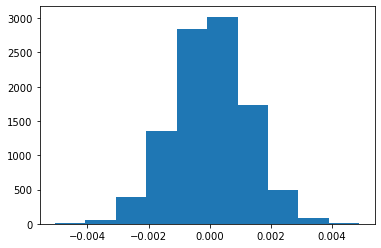

In [27]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
new_page_converted=df2.query('landing_page=="new_page"')['converted'].mean()
old_page_converted=df2.query('landing_page=="old_page"')['converted'].mean()
obs_diff=new_page_converted-old_page_converted
obs_diff

-0.0015782389853555567

In [29]:
low_prob = (p_diffs < obs_diff).mean()
high_prob = (p_diffs.mean() + (p_diffs.mean() - obs_diff) < p_diffs).mean()

In [30]:
low, upper = np.percentile(p_diffs, .5), np.percentile(p_diffs, 99.5)
low, upper

(-0.00323704254141258, 0.003211992117994662)

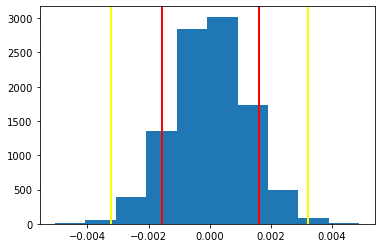

In [31]:
plt.hist(p_diffs);
plt.axvline(x=low, color='yellow', linewidth=2);
plt.axvline(x=upper, color='yellow', linewidth=2);
plt.axvline(obs_diff, color='red', linewidth=2);
plt.axvline(p_diffs.mean() + (p_diffs.mean() - obs_diff), color='red', linewidth=2);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [32]:
p_value=(p_diffs>obs_diff).mean()
p_value

0.9068

If p-value <= 0.05 (small): strong evidence against the null (reject the null)

If p-value > 0.05 (large): weak evidence against the null (fail to reject the null)

**The diagram is in bell shaped normal distribution,  with a large enough sample size, proves the Central Limit Theorem. Most of the data fall within the 99% Confidence Interval(yellow line), favors null hypothesized.**

**Also, the observed differences(red line) between new and old page are relatively small(sometime negative), failed to support the alternative hypothesis p_new>p_old**

**P-value is 0.9086, determine statistical significance of the observed difference.It appears above 0.05 (p-value > alpha), which means we do not have evidence to reject the null hypothesis ( Pnew>=Pold ).**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score,p_value=sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
z_score,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z-score of 1.311 does not exceed the critical value of 1.96, which fail to reject the null hypothesis. The large p-value matches the earlier calculation, also fail to reject null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression is performing in this case, which response variables is categorical variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
import statsmodels.api as sm
df2['ab_page']=df2.group.map({'treatment':1,'control':0})
df2['intercept']=1

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:29:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**H0: pnew − pold = 0**

**H1: pnew − pold ≠ 0**

**p value in ab_page is 0.190**

**The null hypothesis is that when ab_page = 1, converted = 0; the alternative hypothesis is that when ab_page = 1, converted is more likely to be 1.**

**The two different type of t-test produced different p-values. The p-value associated with ab_page in Regression is 0.199,is testing for different proportions(two-tailed). And the p-value in A/B test is 0.9051, uses a one-sided test to check if 2 proportions are statistically better than, worse than, or different than. Both results show that the factor ab_page is not suitable for predicting conversion rate.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**In the practical applications, there are multiple factors may affect the response variable(such as usage-time, user-age, etc), adding other factors can better analyze the variables that affect the results. However, as the additional factors increase,the greater possibility of wrong inferences. For example, the correlation of independent variales will cause multicollinearity and cause regression coefficients to deviate from the desired direction.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [39]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.sample(5)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
635826,UK,2017-01-05 18:45:22.995640,treatment,new_page,0,1,1,0,1,0
939550,US,2017-01-17 16:32:39.782359,control,old_page,0,0,1,0,0,1
796602,US,2017-01-08 23:14:12.372377,treatment,new_page,0,1,1,0,0,1
711975,US,2017-01-21 10:51:25.480831,control,old_page,0,0,1,0,0,1
856549,US,2017-01-11 14:22:28.470874,control,old_page,0,0,1,0,0,1


In [41]:
df_new['intercept']=1
logit_mod=sm.Logit(df_new.converted,df_new[['intercept','ab_page','CA','UK']])
result=logit_mod.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 16 Jun 2021   Pseudo R-squ.:               2.323e-05
Time:                        21:29:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [42]:
1/np.exp(-0.0408),np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

**The new dataset added a new factor 'country', as the summary table shows the treatment group(ab test) compared to US overall conversion. Ca is 1.0416 times less likely to convert, and UK is 1.01times more likely to convert. However, these observed differences are very small, does not make significant impact on the conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
df_new['UK_new_page'] = df_new['UK']*df_new['ab_page']
df_new['US_new_page'] = df_new['US']*df_new['ab_page']
df_new['CA_new_page'] = df_new['CA']*df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,UK_new_page,US_new_page,CA_new_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0


In [46]:
# drop US (now baseline)
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'CA','UK','CA_new_page', 'UK_new_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Jun 2021   Pseudo R-squ.:               2.417e-05
Time:                        10:35:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA             -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK              0.0045      0.018      0.257      0.797      -0.030       0.039
CA_new_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0108      0.023      0.475      0.635      -0.034       0.056
===============================================================================
"""

In [50]:
1/np.exp(-0.0674), np.exp(0.0108)

(1.0697232819209153, 1.010858530520097)

**Compared to the US, CA new page overall conversions rate is 1.069 less likely to convergt, with p-value 0.195. UK new page is more likely to convert with 1.011. While this holds a small amount of statistical significance, it does not hold much practical significance. Although the new test interacted with country factors, but it did ot have much significant impact on the conversion rate, not enough evidence to reject the null hypothesis based from our A/B testing.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

**From the perspective of conversion rate after conducting 3 A/B tests, there is not significant difference between the old and new pages. Even country dataset are not a good fit to predict converted rate. It seems that the company should extend the test runtime and consider more aspects for new page development.**

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.